<a href="https://colab.research.google.com/github/loschinin/OpenAPI/blob/master/Car_features_and_their_corresponding_MSRP_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Цель Блокнота

Применение библиотеки pandas для анализа табличных данных
* Считывание данных из файла
* Анализ базовой информации о данных
* Анализ числовых и категориальных данных

Применение библиотек seaborn и matplotlib для визуализации данных



# Набор данных

**Набор данных об автомобилях с такими характеристиками, как марка, модель, год выпуска, двигатель и другие характеристики автомобиля, используемые для прогнозирования его цены.**

### Характеристики автомобиля и соответствующая рекомендованная розничная цена.

https://www.kaggle.com/datasets/CooperUnion/cardataset/data

## Загрузка данных на Google Drive



In [96]:
from google.colab import files

uploaded = files.upload()

Saving cars.csv to cars (1).csv


# Чтение данных

In [97]:
import pandas as pd
df = pd.read_csv('cars.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

# Чистка от дубликатов

In [98]:
df.duplicated().sum() # Просуммировав мы узнаем сколько всего дубликатов

715

In [99]:
DF = df.drop_duplicates() # Складываем в новый DataFrame результат удаления дубликатов

DF = DF.reset_index(drop=True) # обновим индексы в DataFrame DF.
# если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы
DF.duplicated().sum() # проверили что дубликатов нет
DF

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11194,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11195,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11196,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11197,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## Сохранение DataFrame в файл


Метод `.to_csv(path, index)`

In [7]:
DF.to_csv('/clear_cars.csv',index=False) # если хотим чтобы и индексы сохранились - пишем index = True

## Индексация

**Индексация**

аттрибут `.loc[строки, столбцы]`

In [10]:
DF.loc[11198,'Transmission Type'] # конкретная ячейка

'AUTOMATIC'

In [11]:
DF.loc[:,'Transmission Type'] # столбец в формате Series

0           MANUAL
1           MANUAL
2           MANUAL
3           MANUAL
4           MANUAL
           ...    
11194    AUTOMATIC
11195    AUTOMATIC
11196    AUTOMATIC
11197    AUTOMATIC
11198    AUTOMATIC
Name: Transmission Type, Length: 11199, dtype: object

In [12]:
DF.loc[:,['Transmission Type']].head(5) # столбец в формате DataFrame

,Transmission Type
0,MANUAL
1,MANUAL
2,MANUAL
3,MANUAL
4,MANUAL


In [13]:
DF.loc[:,['Transmission Type','Year']].head(5) #несколько столбцов перечислением

,Transmission Type,Year
0,MANUAL,2011
1,MANUAL,2011
2,MANUAL,2011
3,MANUAL,2011
4,MANUAL,2011


In [15]:
DF.loc[:,'Make':'Transmission Type'].head(5) #несколько столбцов в формате "от" и "до"

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL


In [16]:
DF.loc[69,:] # строка в формате Серий (Series)

Make                                 Chrysler
Model                                     200
Year                                     2016
Engine Fuel Type     flex-fuel (unleaded/E85)
Engine HP                               184.0
Engine Cylinders                          4.0
Transmission Type                   AUTOMATIC
Driven_Wheels               front wheel drive
Number of Doors                           4.0
Market Category                     Flex Fuel
Vehicle Size                          Midsize
Vehicle Style                           Sedan
highway MPG                                36
city mpg                                   23
Popularity                               1013
MSRP                                    22490
Name: 69, dtype: object

In [17]:
DF.loc[69:69,:] # строка в формате DataFrame

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
69,Chrysler,200,2016,flex-fuel (unleaded/E85),184.0,4.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Sedan,36,23,1013,22490


In [18]:
DF.loc[322:1437,:] # несколько строк

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
322,Nissan,370Z,2016,premium unleaded (required),350.0,6.0,AUTOMATIC,rear wheel drive,2.0,"Factory Tuner,High-Performance",Compact,Coupe,26,19,2009,46790
323,Nissan,370Z,2016,premium unleaded (required),332.0,6.0,AUTOMATIC,rear wheel drive,2.0,High-Performance,Compact,Convertible,25,18,2009,49400
324,Nissan,370Z,2016,premium unleaded (required),332.0,6.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,26,18,2009,37070
325,Nissan,370Z,2016,premium unleaded (required),332.0,6.0,AUTOMATIC,rear wheel drive,2.0,High-Performance,Compact,Coupe,26,19,2009,31290
326,Nissan,370Z,2016,premium unleaded (required),332.0,6.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,26,18,2009,37970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,Ford,Aspire,1995,regular unleaded,63.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,38,31,5657,2000
1434,Ford,Aspire,1996,regular unleaded,63.0,4.0,MANUAL,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,38,29,5657,2000
1435,Ford,Aspire,1996,regular unleaded,63.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,38,29,5657,2000
1436,Ford,Aspire,1997,regular unleaded,63.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,38,29,5657,2000


In [20]:
DF.loc[227:229,'Make':'Transmission Type'] #некоторые столбцы и строки

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type
227,Nissan,300ZX,1994,regular unleaded,222.0,6.0,MANUAL
228,Nissan,300ZX,1994,regular unleaded,222.0,6.0,MANUAL
229,Nissan,300ZX,1994,regular unleaded,300.0,6.0,MANUAL


**Логическое Индексирование**

In [26]:
DF[DF['Transmission Type']=='MANUAL'] # можно ставить произвольные условия

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182,BMW,Z4,2015,premium unleaded (required),240.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,34,22,3916,48950
11186,BMW,Z4,2016,premium unleaded (required),240.0,4.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,34,22,3916,49700
11188,BMW,Z8,2001,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,128000
11189,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000


In [25]:
DF[(DF['Transmission Type']=='MANUAL') & (DF['Year']>2016)] #пример как объединить два условия вместе

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
27,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,27495
28,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,24995
29,FIAT,124 Spider,2017,premium unleaded (recommended),160.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Convertible,35,26,819,28195
328,Nissan,370Z,2017,premium unleaded (required),332.0,6.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,26,18,2009,37970
331,Nissan,370Z,2017,premium unleaded (required),332.0,6.0,MANUAL,rear wheel drive,2.0,High-Performance,Compact,Coupe,26,18,2009,29990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,Subaru,WRX,2017,premium unleaded (recommended),268.0,4.0,MANUAL,all wheel drive,4.0,Performance,Compact,Sedan,27,20,640,28995
10765,Subaru,WRX,2017,premium unleaded (required),305.0,4.0,MANUAL,all wheel drive,4.0,"Factory Tuner,High-Performance",Compact,Sedan,23,17,640,35195
11094,Toyota,Yaris iA,2017,regular unleaded,106.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,39,30,2031,15950
11112,Toyota,Yaris,2017,regular unleaded,106.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,36,30,2031,15250


## Сортировка DataFrame



Метод `.sort_values(by)`

`by` - по какой колонке сортируем

In [28]:
DF.sort_values(by = 'MSRP').head(5) # по возрастанию

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
884,Audi,90,1995,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Luxury,Compact,Sedan,23,17,3105,2000
6763,Mazda,Navajo,1992,regular unleaded,155.0,6.0,MANUAL,four wheel drive,2.0,NaN,Compact,2dr SUV,20,15,586,2000
6762,Mazda,MX-6,1997,regular unleaded,114.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,31,23,586,2000
849,Saab,9000,1996,regular unleaded,225.0,4.0,MANUAL,front wheel drive,4.0,"Hatchback,Factory Tuner,Luxury,Performance",Midsize,4dr Hatchback,25,18,376,2000
850,Saab,9000,1996,regular unleaded,210.0,6.0,AUTOMATIC,front wheel drive,4.0,"Hatchback,Luxury",Midsize,4dr Hatchback,24,16,376,2000



Метод `.sort_values(by, ascending= False)`

In [30]:
DF.sort_values(by = 'Year', ascending= False).head(5) # по убыванию

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5599,Subaru,Impreza,2017,regular unleaded,152.0,4.0,AUTOMATIC,all wheel drive,4.0,Hatchback,Compact,4dr Hatchback,37,28,640,21695
5807,Volkswagen,Jetta,2017,premium unleaded (recommended),170.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,35,25,873,24995
5805,Volkswagen,Jetta,2017,regular unleaded,150.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,38,28,873,18995
5804,Volkswagen,Jetta,2017,regular unleaded,150.0,4.0,MANUAL,front wheel drive,4.0,NaN,Midsize,Sedan,40,28,873,20895
5803,Volkswagen,Jetta,2017,regular unleaded,150.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,38,28,873,21995


Можно по нескольким колонкам сразу

In [31]:
DF.sort_values(by = ['MSRP','Popularity'],
               ascending=[True, False]).head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1294,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Cargo Minivan,22,16,5657,2000
1295,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,22,15,5657,2000
1296,Ford,Aerostar,1995,regular unleaded,155.0,6.0,AUTOMATIC,all wheel drive,3.0,NaN,Large,Passenger Minivan,18,14,5657,2000
1297,Ford,Aerostar,1995,regular unleaded,135.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Large,Passenger Minivan,22,15,5657,2000
1298,Ford,Aerostar,1996,regular unleaded,140.0,6.0,AUTOMATIC,rear wheel drive,3.0,NaN,Midsize,Passenger Minivan,21,15,5657,2000


Сначала сортирует по первой, потом по второй

In [32]:
DF.sort_values(by = ['Popularity', 'MSRP'],
               ascending=[True, True]).head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1989,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Coupe,18,13,2,209990
1990,Spyker,C8,2009,premium unleaded (required),400.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,High-Performance",Compact,Convertible,18,13,2,219990
4966,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,Performance",Large,Sedan,28,18,21,41400
4968,Genesis,G80,2017,regular unleaded,311.0,6.0,AUTOMATIC,all wheel drive,4.0,"Luxury,Performance",Large,Sedan,25,16,21,43900
4967,Genesis,G80,2017,premium unleaded (recommended),420.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Luxury,High-Performance",Large,Sedan,23,15,21,54550


посмотрим на то, какие у нас есть категориальные и численные столбцы

In [33]:
cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in DF.columns: # смотрим на все колонки в DataFrame
    if (DF[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно

# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  ['Make', 'Model', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Market Category', 'Vehicle Size', 'Vehicle Style'] 
 Число столблцов =  8
Числовые данные:	  ['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP'] 
 Число столблцов =  8


## Анализ числовых признаков

Статистика по числовым данным

метод `.describe()`

In [34]:
DF.describe() # посчитает "стандартные" статистические параметры для числовых данных
# если данные с типом отличных от числовых - то они проигнорируются

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11199.000000,11130.000000,11169.000000,11193.000000,11199.000000,11199.000000,11199.000000,1.119900e+04
mean,2010.714528,253.388859,5.665950,3.454123,26.610590,19.731851,1558.483347,4.192593e+04
std,7.228211,110.150938,1.797021,0.872946,8.977641,9.177555,1445.668872,6.153505e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.159950e+04
50%,2015.000000,239.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.067500e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.303250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


from matplotlib import pyplot as plt
_df_0['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Engine HP'].plot(kind='hist', bins=20, title='Engine HP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Engine Cylinders'].plot(kind='hist', bins=20, title='Engine Cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Number of Doors'].plot(kind='hist', bins=20, title='Number of Doors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='Engine HP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Engine HP', y='Engine Cylinders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Engine Cylinders', y='Number of Doors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Number of Doors', y='highway MPG', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine HP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine HP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Engine Cylinders']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Engine Cylinders')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Number of Doors']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Number of Doors')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['highway MPG']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('highway MPG')

from matplotlib import pyplot as plt
_df_12['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Engine HP'].plot(kind='line', figsize=(8, 4), title='Engine HP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Engine Cylinders'].plot(kind='line', figsize=(8, 4), title='Engine Cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Number of Doors'].plot(kind='line', figsize=(8, 4), title='Number of Doors')
plt.gca().spines[['top', 'right']].set_visible(False)

### Агрегация

К DataFrame применяется метод `.groupby()` с указанием (по чему группировать), а затем то, что хотим посчитать по группе (в данном случае `.mean()`)

In [35]:
DF.groupby(['Transmission Type'],).mean(num_columns)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Transmission Type,,,,,,,,
AUTOMATED_MANUAL,2014.443038,336.797468,5.967450,2.974638,28.875226,20.408680,1755.036166,108718.987342
AUTOMATIC,2011.844554,260.950044,5.854006,3.685325,25.718482,18.902925,1525.670323,41816.124307
DIRECT_DRIVE,2015.352941,148.375000,0.137931,3.904762,97.970588,110.794118,1762.029412,47351.250000
MANUAL,2006.469628,214.417616,5.155284,2.853455,26.998102,19.752468,1615.311314,28267.919894
UNKNOWN,1997.416667,191.666667,5.833333,2.166667,22.500000,15.916667,562.916667,3647.833333


Или даже более сложная статистика

К DataFrame применяется метод `.groupby()` с указанием (по чему группировать), а затем `.agg()`, где **списком** перичисляем то что хотим посчитать

список состоит из элементов вида `('название', функция)`


In [37]:
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

In [38]:
DF.groupby(['Transmission Type'],)[num_columns].agg( [ ('median',np.median),
                                    ('std',np.std),
                                    ('Q5%', lambda x: np.percentile(x, q=5)),
                                    ('Q95%',lambda x: np.percentile(x, q=95))])

Year                           Engine HP              \
                   median       std     Q5%    Q95%    median         std   
Transmission Type                                                           
AUTOMATED_MANUAL   2015.0  2.964297  2007.6  2017.0     252.0  175.890989   
AUTOMATIC          2015.0  6.227857  1998.0  2017.0     260.0   95.669256   
DIRECT_DRIVE       2015.5  1.103112  2014.0  2017.0     147.0   36.355506   
MANUAL             2008.0  8.792110  1992.0  2017.0     179.0  118.364742   
UNKNOWN            1999.0  3.287949  1992.1  2000.0     190.0   75.838744   

                                Engine Cylinders            ... city mpg  \
                     Q5%   Q95%           median       std  ...      Q5%   
Transmission Type                                           ...            
AUTOMATED_MANUAL   150.0  632.0              4.0  2.644181  ...     10.0   
AUTOMATIC            NaN    NaN              6.0  1.668293  ...     13.0   
DIRECT_DRIVE         NaN    NaN              0.0  0.736237  ...     78.0   
MANUAL              94.0  460.0              4.0  1.669872  ...     12.0   
UNKNOWN            100.0  305.0              6.0  1.585923  ...     13.1   

                         Popularity                                 MSRP  \
                    Q95%     median          std    Q5%    Q95%   median   
Transmission Type                                                          
AUTOMATED_MANUAL    31.0     1158.0  1227.046496  238.0  3916.0  43550.0   
AUTOMATIC           29.0     1385.0  1461.668985  155.0  5657.0  33000.0   
DIRECT_DRIVE       132.0     1391.0  1121.239279  617.0  3916.0  35825.0   
MANUAL              29.0     1385.0  1443.647007  204.0  5657.0  19375.0   
UNKNOWN             19.9      549.0   523.562353   26.0  1390.1   2249.5   

                                                       
                             std       Q5%       Q95%  
Transmission Type                                      
AUTOMATED_MANUAL   170768.978915  24567.00  315888.00  
AUTOMATIC           48612.244035   2316.55   89090.00  
DIRECT_DRIVE        25385.798935  25137.50  100615.00  
MANUAL              41528.575082   2000.00   97676.75  
UNKNOWN              2789.843718   2000.00    9006.55  

[5 rows x 32 columns]

### Корреляция числовых признаков

Посмотрим на корреляцию числовых столбцов

`.corr()` для получения матрицы корреляции из DataFrame (нечисловые признаки будут проигнорированы)

`.style.background_gradient(cmap, vmin, vmax)` чтобы подсветить красиво таблицу

In [45]:
DF[num_columns].corr().style.background_gradient(cmap = 'YlOrRd', # наш цветовой стиль
                                    vmin = -1, # указываем нижний диапазон
                                    vmax=1) # указываем верхний  диапазон

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.336208,-0.034148,0.247574,0.244972,0.188417,0.085874,0.209635
Engine HP,0.336208,1.000000,0.788433,-0.129278,-0.415452,-0.446855,0.042499,0.659174
Engine Cylinders,-0.034148,0.788433,1.000000,-0.149877,-0.617420,-0.598708,0.038640,0.538712
Number of Doors,0.247574,-0.129278,-0.149877,1.000000,0.114673,0.120682,-0.057235,-0.144925
highway MPG,0.244972,-0.415452,-0.617420,0.114673,1.000000,0.886299,-0.017159,-0.166631
city mpg,0.188417,-0.446855,-0.598708,0.120682,0.886299,1.000000,-0.000549,-0.162343
Popularity,0.085874,0.042499,0.038640,-0.057235,-0.017159,-0.000549,1.000000,-0.048371
MSRP,0.209635,0.659174,0.538712,-0.144925,-0.166631,-0.162343,-0.048371,1.000000


Но статистика не всегда даёт ответы на все вопросы

## Категориальные данные
посмотрим на число повторений результата в каждом категориальном признаке

метод `.nunique()`

In [46]:
DF[cat_columns].nunique()   # возврашает Series
                            #В роли индексов - название столюцов
                            #значения - количество уникальных значений в столбце

Make                  48
Model                915
Engine Fuel Type      10
Transmission Type      5
Driven_Wheels          4
Market Category       71
Vehicle Size           3
Vehicle Style         16
dtype: int64

Считаем сколько раз каждое значение категории встретчается методом

`.value_counts()`

In [49]:
DF.Model.value_counts() # посмотрим на столбец Model

Silverado 1500    156
Tundra            129
F-150             126
Sierra 1500        90
Frontier           76
                 ... 
M4 GTS              1
LFA                 1
Horizon             1
GS F                1
Zephyr              1
Name: Model, Length: 915, dtype: int64

Оказалось, что часть из наших признаков имеют слишком много записей. Вероятно, редкие из них можно исключить без потери точности. Мы сделаем эту операцию объявив такие записи одним типом - rare.



In [52]:
counts = DF.Make.value_counts() #  посмотрим на столбец Make

counts  # опять Series
        #В роли Индексов - уникальное значение столбца
        #В роли значений  - сколько раз это значение встречается

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Tesla              18
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis   

In [53]:
counts.median() # оцениваем медиану встречаемости разных признаков

184.0

In [57]:
counts[counts<100] # посмотрим на марки которые встречаются реже чем 100 раз

Aston Martin    91
Bentley         74
Plymouth        71
Ferrari         69
FIAT            62
Scion           60
Maserati        55
Lamborghini     52
Rolls-Royce     31
Lotus           28
Tesla           18
HUMMER          17
Maybach         16
McLaren          5
Alfa Romeo       5
Genesis          3
Bugatti          3
Spyker           2
Name: Make, dtype: int64

In [58]:
rare =  counts[(counts.values < 25)] # находим все редкие категории
DF['Make'] = DF['Make'].replace(rare.index.values, 'Rare') # заменим все редкие значения на "Rare"
                                # берем индексы, потому что в индексах rare скрыты редкие значения
                                # применяем values чтобы получился массив numpy
DF.Make.value_counts() # пересчитаем сколько кого осталось

Chevrolet        1083
Ford              825
Toyota            719
Volkswagen        568
Nissan            551
Dodge             529
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
Rare               69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Name: Make, dtype: int64

# Библиотеки для визуализации данных

In [59]:
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns # библиотека Seaborn для визуализации данных из Pandas

Документация библиотеки [matplotlib](https://matplotlib.org/)

Документация библиотеки [seaborn](https://seaborn.pydata.org/)

In [61]:
plt.style.use('ggplot') # выбираем стиль для отрисовки

[Разные Стили](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)

## Гистограммы распределений

рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

Гистограмма seaborn  `.histplot(data, x, bins)`

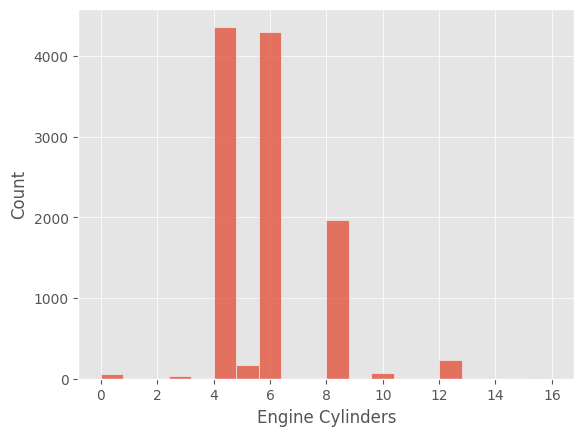

In [63]:
# рисуем с помощью библиотеки seaborn
sns.histplot(data=DF, # какой датафрейм используем
            x='Engine Cylinders', # какую переменную отрисовываем
            bins = 20);  # на сколько ячеек разбиваем

Чтобы не всё вручную прописывать напишем код который будет делать это за нас

In [64]:
num_columns

['Year',
 'Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

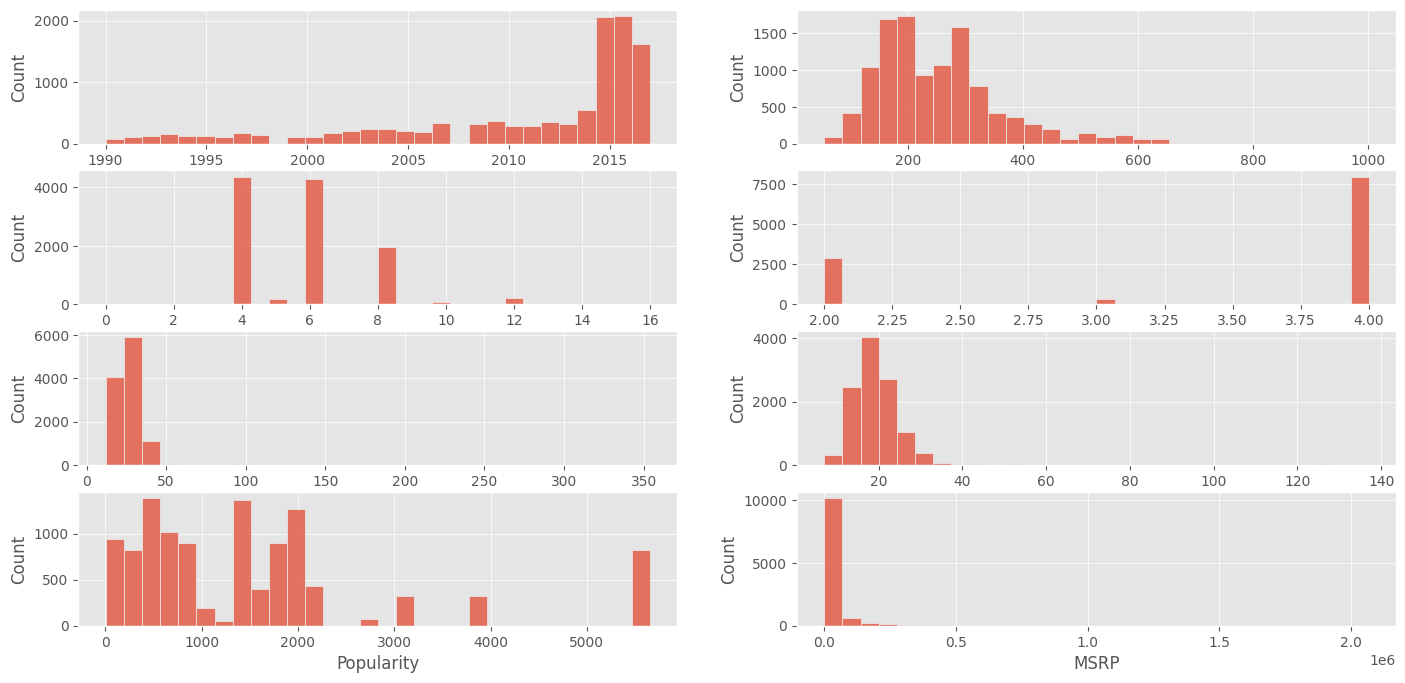

In [100]:
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(17,8)) # создаем "полотно", на котором будем "рисовать" графики
#     ↑  более точная структура (почти синоним subplot). Говорим что у нас будет height строк и width столбцов

for idx, column_name in enumerate(num_columns): # перебираем все числовые данные
    plt.subplot(height,width, idx+1) #берем конкретную ячейку из заранее подготовленную заготовки
    # рисуем с помощью библиотеки seaborn
    sns.histplot(data=DF, # какой датафрейм используем
            x=column_name, # какую переменную отрисовываем
            bins = 30);  # на сколько ячеек разбиваем

Столбцы имеют явные аномалии, например `Popularity` и `MSRP`.

Чтобы лучше понять эти аномалии посмотрим на столбцы в логарифмическом масштабе.

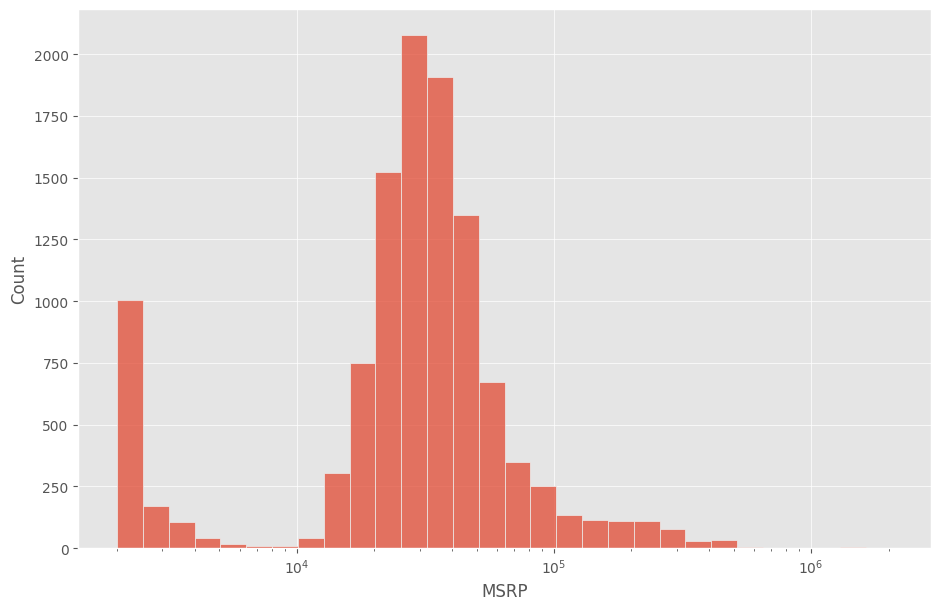

In [101]:
plt.figure(figsize=(11,7)) # создаем "полотно", уточняем размер
sns.histplot(data=DF, # какой датафрейм используем
             x='MSRP', # какую переменную отрисовываем
             bins = 30, # на сколько ячеек разбиваем
             log_scale = True); # захотели использовать логарифмический масштаб (для очень больших диапазонов)

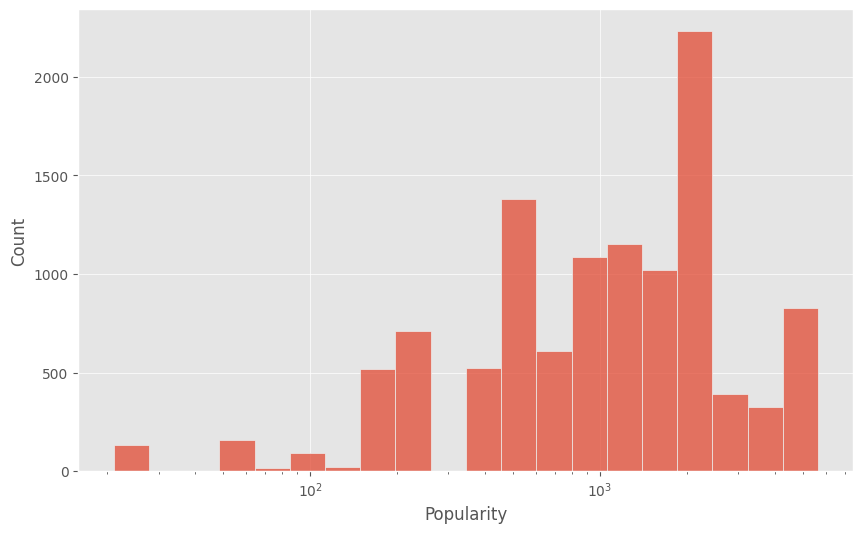

In [103]:
# Удалим те объекты у которых Popularity равно 2
question_dist = DF[DF.Popularity == 2] # через логическое индексирование определяем проблемные данные
DF = DF.drop(question_dist.index) # удаляем данные по проблемным индексам


plt.figure(figsize=(10,6))
sns.histplot(data=DF,
        x='Popularity',
        bins = 20,
        log_scale = True);

Теперь мы можем определить, что нам требуется, чтобы почистить столбцы.

Также, так как задача хорошо интерпретируема мы можем почистить столбцы пользуясь здравым смыслом.

Например, мы можем удалить записи, где цена меньше 300 или популярность меньше 200 и год старый.

In [117]:
# здравый смысл
question_pop = DF[(DF.Year < 2000) & (DF.Popularity < 200)]
DF = DF.drop(question_pop.index)


# анализ гистограмм
question_price = DF[DF["Popularity"] > 2500]
DF = DF.drop(question_price.index)

# здравый смысл
question_price = DF[(DF["MSRP"] < 300)]
DF = DF.drop(question_price.index)

# анализ гистограмм
question_price = DF[DF["MSRP"] > 0.5e6]
DF = DF.drop(question_price.index)

DF = DF.reset_index(drop=True)  # обновим индексы в датафрейме DF. если бы мы прописали drop = False, то была бы еще одна колонка - старые индексы

Посмотрим на результат

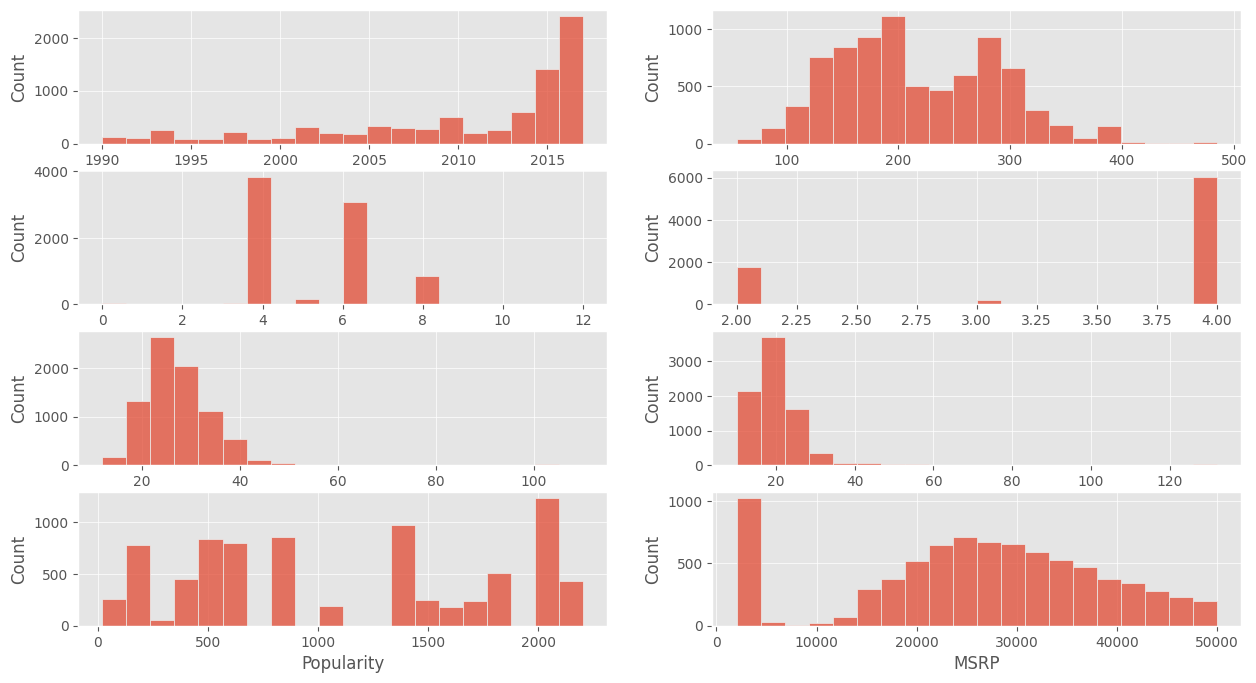

In [118]:
# аналогично рассмотреному выше примеру, только уже без проблемных данных
width = 2
height = int(np.ceil(len(num_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(15,8))

for idx, column_name in enumerate(num_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=DF,
            x=column_name, bins = 20);

## Зависимости параметров друг от друга

pairplot seaborn
`.pairplot(data, hue, palette)`

по диагонали - гистограммы распределения отдельных признаков

другие элементы - скатерограммы

Важно!
Если признаков много (больше 5-10) то будет отрисовывать очень долго.
Поэтому предварительно разбиваем на подгруппы

[Перечень цветовых карт ](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

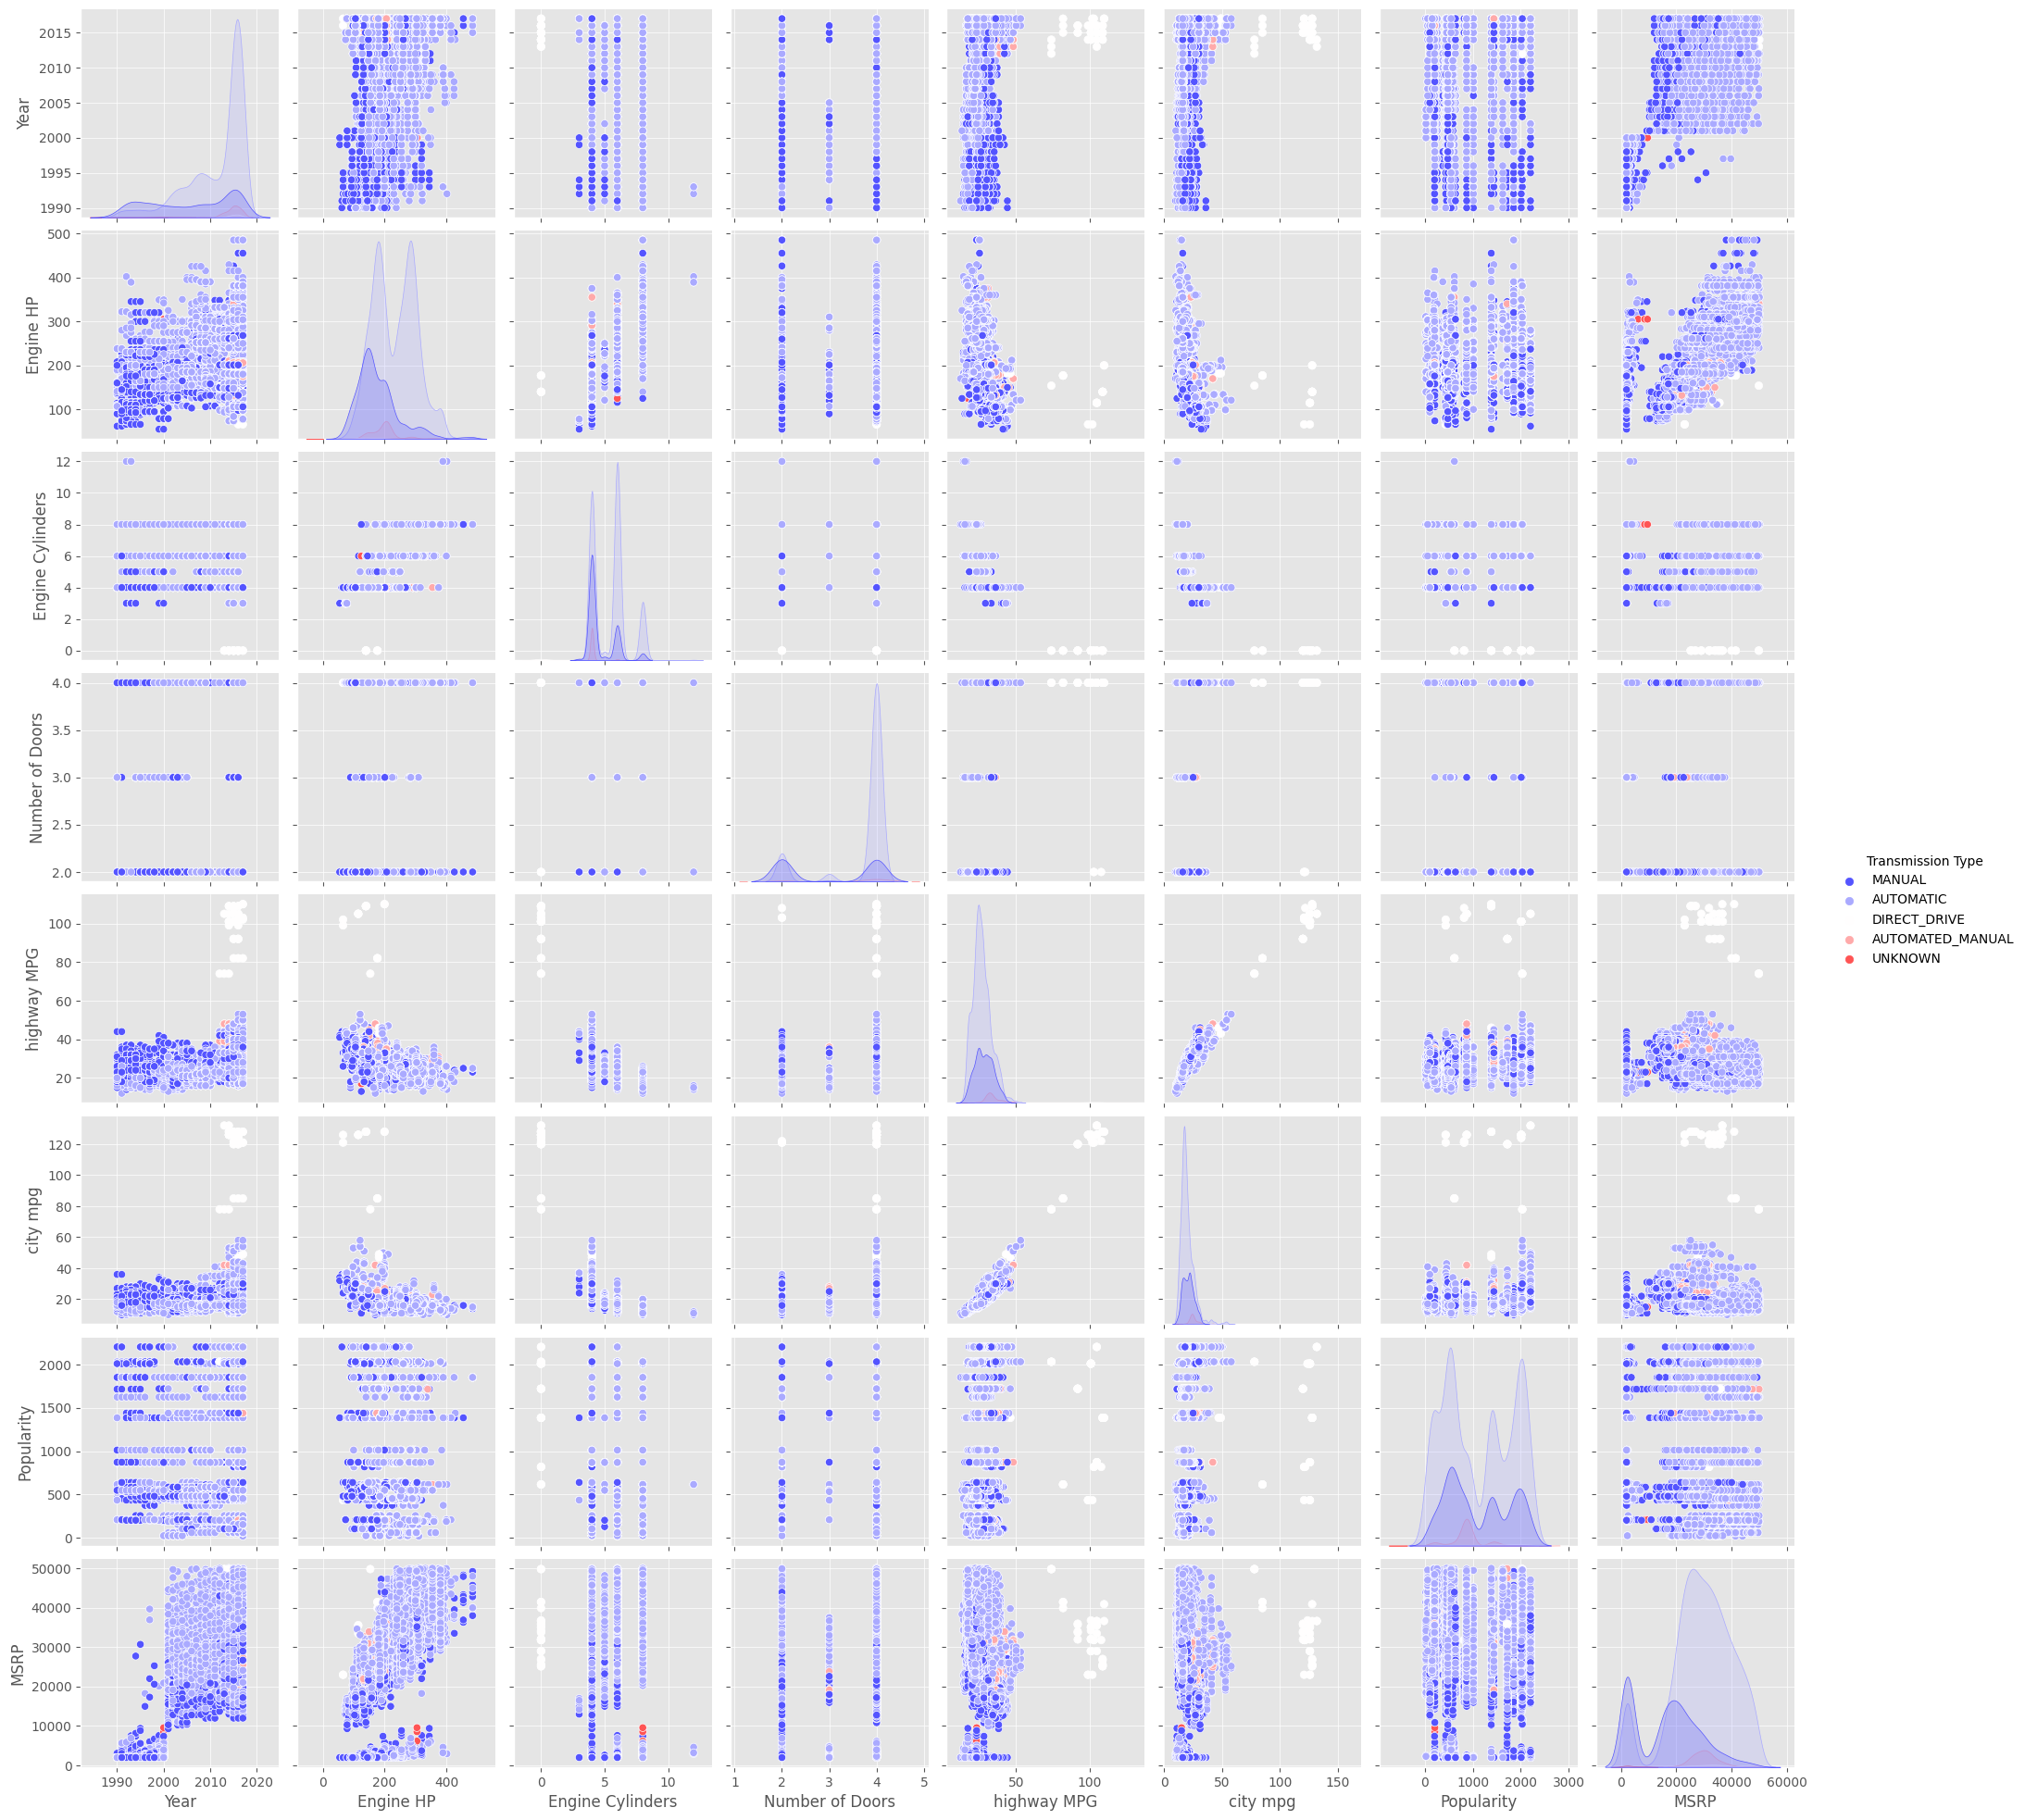

In [119]:
sns.pairplot(data = DF,  # какой датафрейм используем
             hue ='Transmission Type', # какую переменную используем для подкрашиваиния данных.
                                # Рекомендуется использовать Категориальные данные (не очень много уникальных значений)
             palette = 'bwr',); # какую цветовую карту используем. Здесь у нас всего 2 варианта, то мы используем bwr - один из Diverging
                                # если категорий больше, то лучше использовать что-то из Qualitative

## Гистограммы распределений (аналог)

рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

Другой способ рисовать гистограммы в seaborn  `.countplot(data, x)`

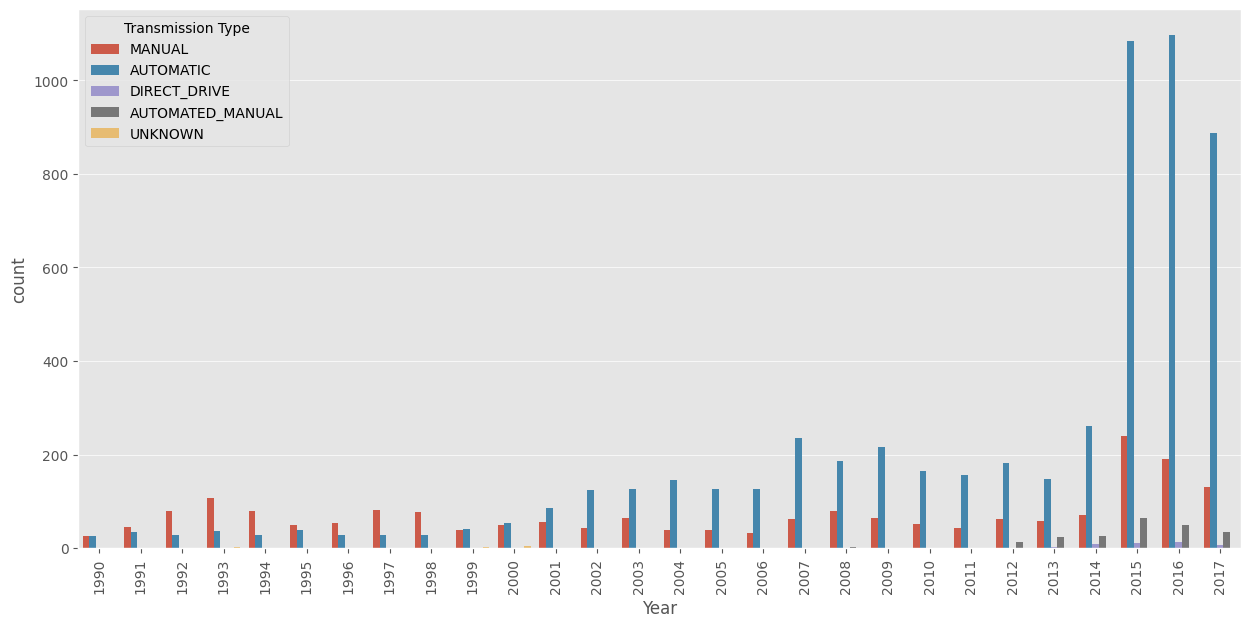

In [120]:
fig, ax = plt.subplots(1, figsize=(15, 7))
sns.countplot(data=DF, x="Year", hue="Transmission Type", ax=ax)
ax.tick_params(axis='x', rotation=90)

## Скатерограмма данных

рассмотрим диаграмму рассеяния (скатерограмму) для двух числовых признаков

Скатерограмма seaborn  `.scatterplot(data, x, y)`

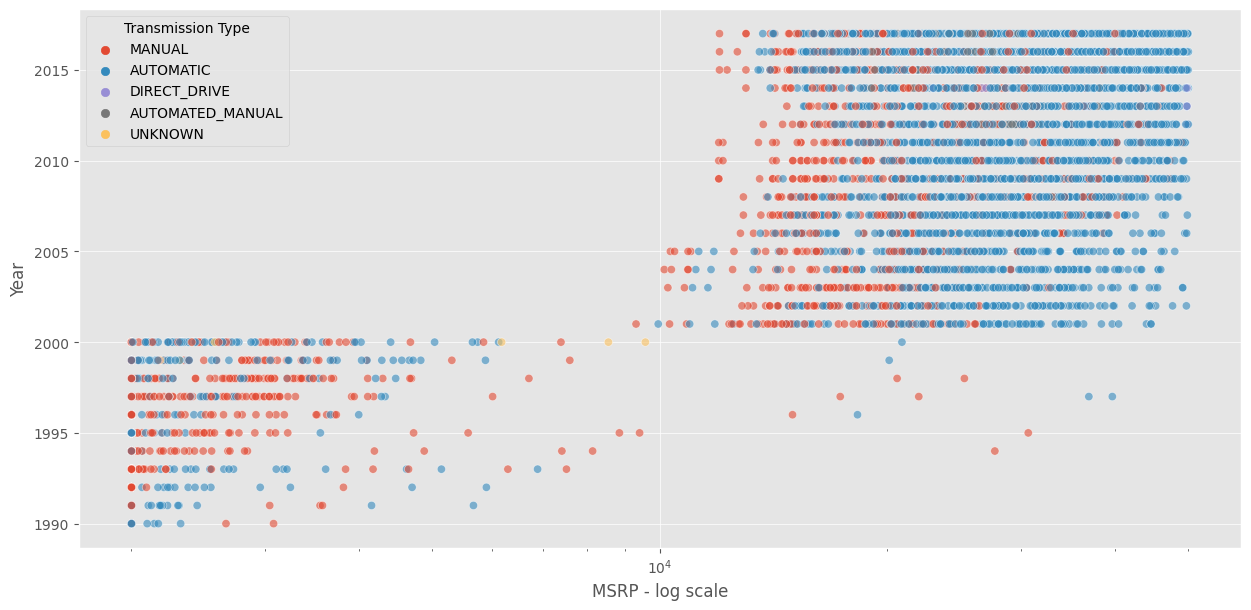

In [122]:
fig, ax = plt.subplots(1, figsize=(15, 7))
sns.scatterplot(data=DF,
                x='MSRP', y='Year',
                hue='Transmission Type', alpha = 0.6,
                ax=ax)
plt.xscale("log")
plt.xlabel("MSRP - log scale");

## Violinplot

Скрипичная диаграмма для оценки распределения числового признака для разных значений категориальных признаков

Скатерограмма seaborn  `.violinplot(data, x, y)`

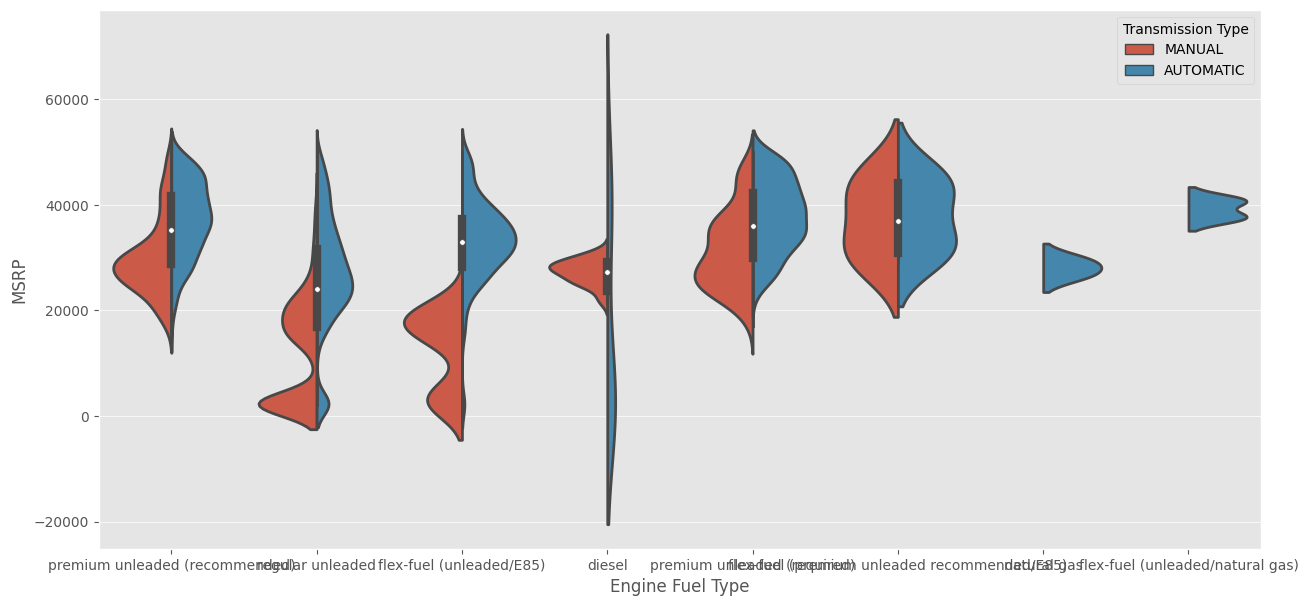

In [136]:
filtered_DF = DF[DF["Transmission Type"].isin(["MANUAL", "AUTOMATIC"])]
fig, ax = plt.subplots(1, figsize=(15, 7))
sns.violinplot(data=filtered_DF,
               x="Engine Fuel Type",  y='MSRP',
               hue="Transmission Type", split = True,
               ax=ax);